In [1]:
# https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html

In [2]:
# import relevant libraries
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#API Set-Up
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [3]:
# Create daatframes
elements_df = pd.DataFrame(json['elements'])
element_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [4]:
# create main dataframe with a few different fields
main_df = elements_df[['web_name','first_name','team','element_type','now_cost','selected_by_percent','transfers_in','transfers_out','form','event_points','total_points','bonus','points_per_game','value_season','minutes','goals_scored','assists','ict_index','clean_sheets','saves']]

In [5]:
main_df.head()

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves
0,Özil,Mesut,1,3,67,0.5,3441,54064,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0
1,Sokratis,Sokratis,1,2,48,0.1,10266,19016,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0
2,David Luiz,David,1,2,54,0.7,50299,101665,2.7,0,25,0,1.9,4.6,886,0,0,24.9,3,0
3,Aubameyang,Pierre-Emerick,1,3,113,6.5,579446,3271267,3.3,1,73,6,3.8,6.5,1574,5,1,105.0,7,0
4,Cédric,Cédric,1,2,46,0.3,21801,40654,3.7,2,23,3,3.8,5.0,429,0,1,17.7,2,0


In [6]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [7]:

sig_players = main_df[main_df.minutes>270]


In [8]:
sig_players.columns

Index(['web_name', 'first_name', 'team', 'element_type', 'now_cost',
       'selected_by_percent', 'transfers_in', 'transfers_out', 'form',
       'event_points', 'total_points', 'bonus', 'points_per_game',
       'value_season', 'minutes', 'goals_scored', 'assists', 'ict_index',
       'clean_sheets', 'saves'],
      dtype='object')

In [9]:
sig_players.points_per_game.astype(float)

2      1.9
3      3.8
4      3.8
5      4.0
7      4.0
      ... 
648    1.9
649    1.6
651    1.1
652    2.6
654    2.9
Name: points_per_game, Length: 370, dtype: float64

In [10]:
sig_players.form.astype(float)
sig_players.now_cost.astype(float)
sig_players.dtypes

web_name               object
first_name             object
team                    int64
element_type            int64
now_cost                int64
selected_by_percent    object
transfers_in            int64
transfers_out           int64
form                   object
event_points            int64
total_points            int64
bonus                   int64
points_per_game        object
value_season           object
minutes                 int64
goals_scored            int64
assists                 int64
ict_index              object
clean_sheets            int64
saves                   int64
dtype: object

In [11]:
sig_players.now_cost.astype(float)
sig_players.dtypes

web_name               object
first_name             object
team                    int64
element_type            int64
now_cost                int64
selected_by_percent    object
transfers_in            int64
transfers_out           int64
form                   object
event_points            int64
total_points            int64
bonus                   int64
points_per_game        object
value_season           object
minutes                 int64
goals_scored            int64
assists                 int64
ict_index              object
clean_sheets            int64
saves                   int64
dtype: object

In [12]:
sig_players.dtypes

web_name               object
first_name             object
team                    int64
element_type            int64
now_cost                int64
selected_by_percent    object
transfers_in            int64
transfers_out           int64
form                   object
event_points            int64
total_points            int64
bonus                   int64
points_per_game        object
value_season           object
minutes                 int64
goals_scored            int64
assists                 int64
ict_index              object
clean_sheets            int64
saves                   int64
dtype: object

Text(0.5, 0, 'PPG')

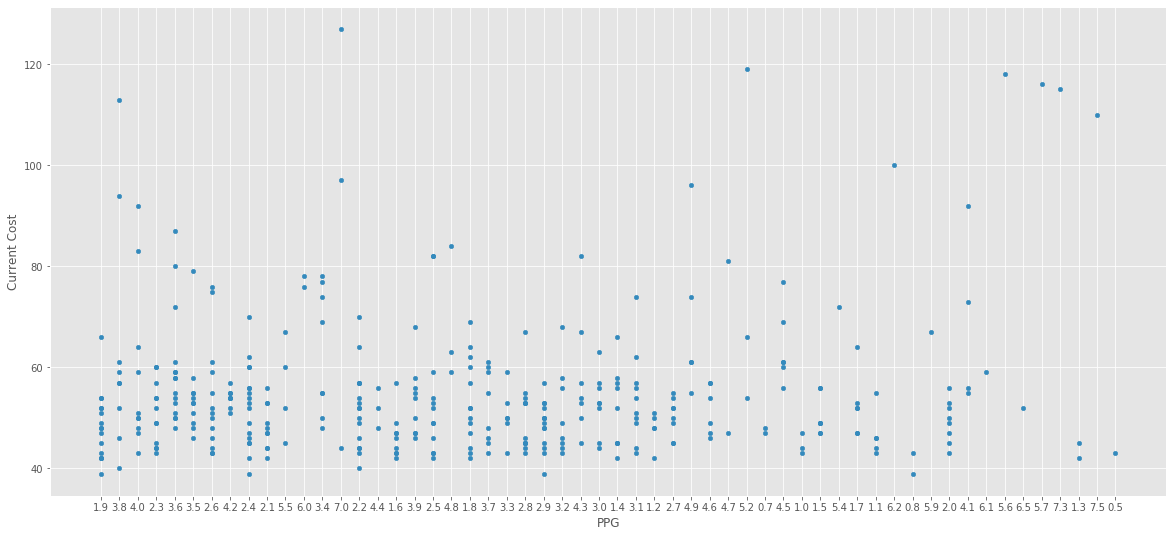

In [13]:
sig_players.plot(kind='scatter',x='points_per_game',y='now_cost',figsize=(20,9))
plt.ylabel('Current Cost')
plt.xlabel('PPG')

In [14]:
x = np.random.rand(334)

Text(0.5, 0, 'PPG')

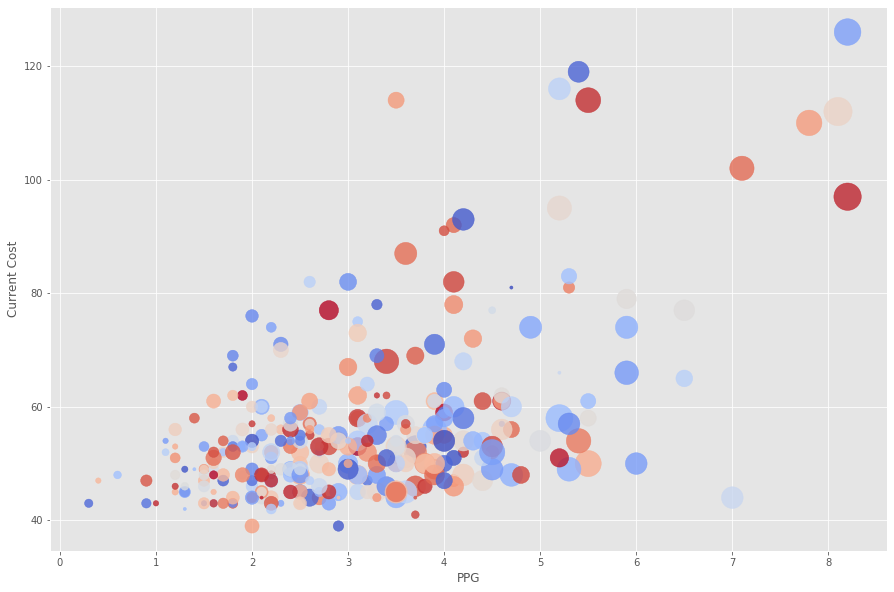

In [101]:
plt.figure(figsize = (15,10))
ax = plt.scatter(sig_players['points_per_game'],sig_players['now_cost'],c=x,cmap='coolwarm',s=sig_players['form']*100,alpha=0.8)
#for i, txt in enumerate(sig_players.web_name):
 #      ax.annotate(txt, (gk_df.now_cost.iat[i],gk_df.points_per_game.iat[i]))
plt.ylabel('Current Cost')
plt.xlabel('PPG')


# 3 variables on a plane, just need to do the labelling

In [15]:
# example of boolean filtering
main_df[main_df.first_name=='Mesut']

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves
0,Özil,Mesut,1,3,67,0.5,3441,54064,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0


In [16]:
# left join to get team names instead of team id
main_df=pd.merge(left=main_df,right=teams_df[['id','name']],left_on='team',right_on='id',how='left')

In [17]:
# delete column that is repetitive
main_df.drop(['id'],axis=1)

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves,name
0,Özil,Mesut,1,3,67,0.5,3441,54064,0.0,0,...,0,0.0,0.0,0,0,0,0.0,0,0,Arsenal
1,Sokratis,Sokratis,1,2,48,0.1,10266,19016,0.0,0,...,0,0.0,0.0,0,0,0,0.0,0,0,Arsenal
2,David Luiz,David,1,2,54,0.7,50299,101665,2.7,0,...,0,1.9,4.6,886,0,0,24.9,3,0,Arsenal
3,Aubameyang,Pierre-Emerick,1,3,113,6.5,579446,3271267,3.3,1,...,6,3.8,6.5,1574,5,1,105.0,7,0,Arsenal
4,Cédric,Cédric,1,2,46,0.3,21801,40654,3.7,2,...,3,3.8,5.0,429,0,1,17.7,2,0,Arsenal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Söndergaard,Andreas,20,1,40,0.3,27528,9128,0.0,0,...,0,0.0,0.0,0,0,0,0.0,0,0,Wolves
662,Cutrone,Patrick,20,4,59,0.0,3443,3204,0.3,0,...,0,1.0,0.3,23,0,0,0.2,0,0,Wolves
663,Lonwijk,Nigel,20,2,40,0.0,889,472,0.0,0,...,0,0.0,0.0,0,0,0,0.0,0,0,Wolves
664,Willian José,Willian José,20,4,70,0.2,24685,7337,2.5,2,...,0,2.5,1.4,258,0,1,12.4,1,0,Wolves


In [18]:
# left join to get position names
main_df=pd.merge(left=main_df,right=element_types_df[['id','singular_name']],left_on='element_type',right_on='id', how='left')

In [19]:
# rename to position name
main_df = main_df.rename(columns={'singular_name':'position'})

In [20]:
# Create new column and change the data types to do calculations
main_df['value'] = main_df.value_season.astype(float)
main_df['ict_score'] = main_df.ict_index.astype(float)
main_df['selection_percentage'] = main_df.selected_by_percent.astype(float)
main_df['current_form'] = main_df.form.astype(float)
main_df['points_per_game'] = main_df.points_per_game.astype(float)
#Total Goals Contribution column = Goals + Assists
main_df['total_contribution']= main_df['goals_scored'] + main_df['assists']


In [21]:
# filter
active_players = main_df[main_df.minutes > 0]

In [22]:
# aggregate claculation that can be done
positions = main_df.groupby(by='position',as_index=False).aggregate({'value':np.mean,'total_points':np.sum})

In [23]:
# example of a double filter
main_df[(main_df.minutes > 180) & (main_df.points_per_game > 4)]

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,saves,id_x,name,id_y,position,value,ict_score,selection_percentage,current_form,total_contribution
9,Marí,Pablo,1,2,44,0.1,31418,27067,0.0,0,...,0,1,Arsenal,2,Defender,3.2,7.4,0.1,0.0,0
20,Saka,Bukayo,1,3,54,10.0,1338559,1100188,4.8,2,...,0,1,Arsenal,3,Midfielder,15.7,156.3,10.0,4.8,8
33,Martínez,Emiliano,2,1,52,34.8,3146597,1129053,5.5,9,...,75,2,Aston Villa,1,Goalkeeper,22.3,59.4,34.8,5.5,0
39,Hourihane,Conor,2,3,59,0.1,23841,26923,0.0,0,...,0,2,Aston Villa,3,Midfielder,3.4,18.2,0.1,0.0,2
43,Grealish,Jack,2,3,78,40.7,5193285,3018226,5.0,2,...,0,2,Aston Villa,3,Midfielder,16.3,247.6,40.7,5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Soucek,Tomas,19,3,54,18.7,2354085,1270070,4.8,0,...,0,19,West Ham,3,Midfielder,19.6,137.9,18.7,4.8,9
622,Dawson,Craig,19,2,45,0.8,75357,16914,5.3,6,...,0,19,West Ham,2,Defender,9.8,29.9,0.8,5.3,2
632,Jiménez,Raúl,20,4,82,4.8,1158384,2201802,0.0,0,...,0,20,Wolves,4,Forward,5.2,55.0,4.8,0.0,5
633,Saïss,Romain,20,2,49,5.4,2172689,2193347,0.3,0,...,0,20,Wolves,2,Defender,13.1,58.4,5.4,0.3,3


In [24]:
# convert int to string (not sure why it was int in the first place)
main_df['name'] = main_df.name.astype(str)

In [25]:
# create new column
main_df['ppgpm'] = main_df.points_per_game / main_df.now_cost

In [26]:
# create a filtered list of players
significant_players = main_df[main_df.minutes>180]

In [29]:
# drive to insight
significant_players.sort_values(by='ppgpm',ascending = False).head(20)

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,id_x,name,id_y,position,value,ict_score,selection_percentage,current_form,total_contribution,ppgpm
45,Hause,Kortney,2,2,44,0.2,80272,71878,0.0,0,...,2,Aston Villa,2,Defender,6.4,14.2,0.2,0.0,1,0.159091
364,Stones,John,12,2,52,20.5,1956794,413797,6.7,2,...,12,Man City,2,Defender,16.3,42.7,20.5,6.7,2,0.125000
622,Dawson,Craig,19,2,45,0.8,75357,16914,5.3,6,...,19,West Ham,2,Defender,9.8,29.9,0.8,5.3,2,0.122222
9,Marí,Pablo,1,2,44,0.1,31418,27067,0.0,0,...,1,Arsenal,2,Defender,3.2,7.4,0.1,0.0,0,0.106818
33,Martínez,Emiliano,2,1,52,34.8,3146597,1129053,5.5,9,...,2,Aston Villa,1,Goalkeeper,22.3,59.4,34.8,5.5,0,0.105769
362,Gündogan,Ilkay,12,3,59,22.9,2035623,288604,8.4,13,...,12,Man City,3,Midfielder,17.6,133.8,22.9,8.4,10,0.103390
141,Jorginho,Jorge Luiz,5,3,47,3.8,1312882,1340467,5.0,10,...,5,Chelsea,3,Midfielder,15.1,71.3,3.8,5.0,7,0.100000
143,Rüdiger,Antonio,5,2,46,3.0,225043,157151,4.8,0,...,5,Chelsea,2,Defender,8.0,26.9,3.0,4.8,0,0.100000
502,Vestergaard,Jannik,16,2,47,2.7,1401838,1321269,0.2,1,...,16,Southampton,2,Defender,13.6,62.9,2.7,0.2,3,0.097872
144,Zouma,Kurt,5,2,54,10.0,2444569,1975312,0.0,0,...,5,Chelsea,2,Defender,14.4,64.2,10.0,0.0,4,0.096296


In [30]:
# group by team, do a calculation on a different column (s)
main_df.groupby(['position','name']).agg({'points_per_game':np.mean,'total_points':np.mean, ''}).sort_values(by=['points_per_game'],ascending = False)

SyntaxError: invalid syntax (<ipython-input-30-c1eb0acdc068>, line 2)

In [31]:
# code to create segmented dataFrames
gk_df = main_df.loc[main_df.position == 'Goalkeeper']
#gk_df = gk_df[['web_name','team','selection_percentage','now_cost','clean_sheets','saves','bonus','total_points','value']]
def_df = main_df.loc[main_df.position == 'Defender']
#def_df = def_df[['web_name','team','selection_percentage','now_cost','clean_sheets','assists','goals_scored','total_contribution','ict_score','bonus','total_points','value']]
mid_df = main_df.loc[main_df.position == 'Midfielder']
#mid_df = mid_df[['web_name','team','selection_percentage','now_cost','assists','goals_scored','total_contribution','ict_score','current_form','bonus','total_points','value']]
fwd_df = main_df.loc[main_df.position == 'Forward']
#fwd_df = fwd_df[['web_name','team','selection_percentage','now_cost','assists','goals_scored','total_contribution','ict_score','current_form','minutes','bonus','total_points','value']]

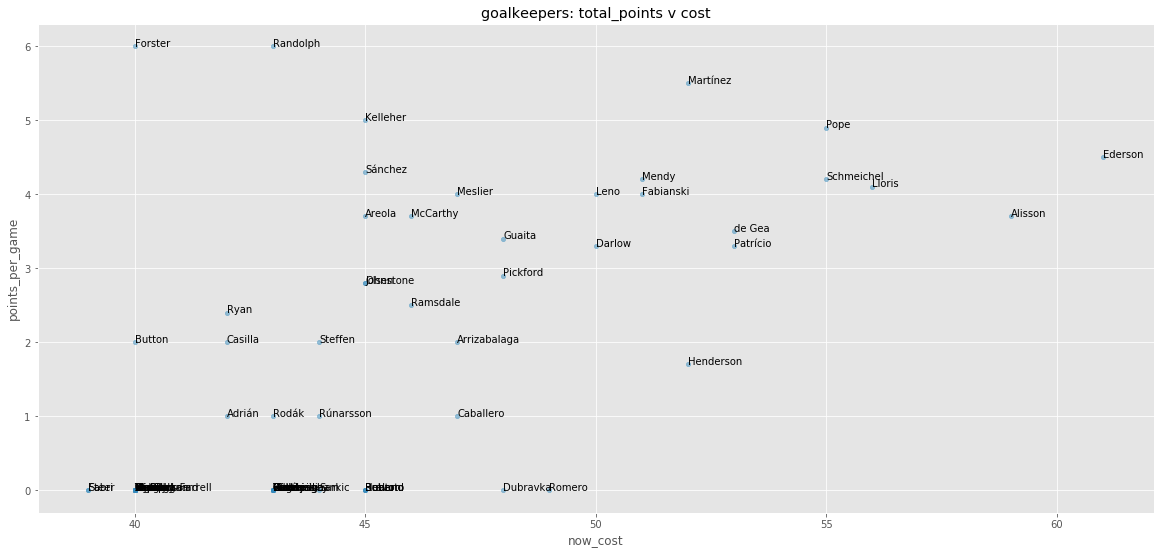

In [32]:
# create a scatter plot and the for loop for the labels
ax = gk_df.plot.scatter(x='now_cost',y='points_per_game', alpha=.5, figsize=(20,9), title="goalkeepers: total_points v cost")
for i, txt in enumerate(gk_df.web_name):
       ax.annotate(txt, (gk_df.now_cost.iat[i],gk_df.points_per_game.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

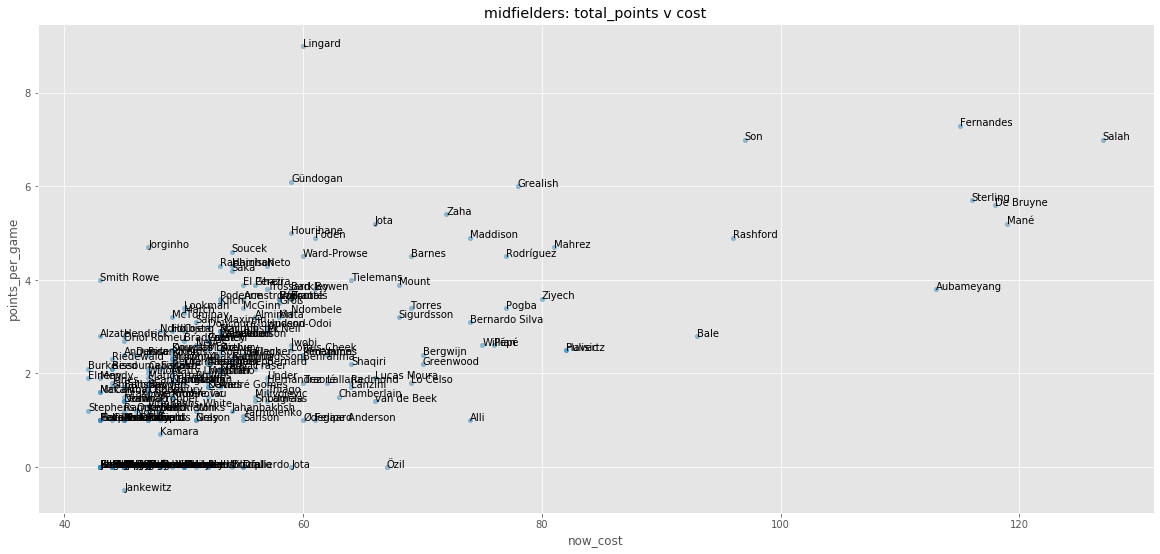

In [51]:
# create a scatter plot and the for loop for the labels
ax = mid_df.plot.scatter(x='now_cost',y='points_per_game', alpha=.5, figsize=(20,9), title="midfielders: total_points v cost")
for i, txt in enumerate(mid_df.web_name):
       ax.annotate(txt, (mid_df.now_cost.iat[i],mid_df.points_per_game.iat[i]))
plt.grid(which='both', axis='both', ls='-')
plt.show()

In [33]:
# best pppgm by position
gk_df.sort_values(by='ppgpm',ascending=False)


,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,id_x,name,id_y,position,value,ict_score,selection_percentage,current_form,total_contribution,ppgpm
516,Forster,Fraser,16,1,40,6.2,627126,237990,0.0,0,...,16,Southampton,1,Goalkeeper,1.5,1.2,6.2,0.0,0,0.150000
599,Randolph,Darren,19,1,43,0.2,21389,24826,0.0,0,...,19,West Ham,1,Goalkeeper,1.4,1.4,0.2,0.0,0,0.139535
350,Kelleher,Caoimhin,11,1,45,0.1,31356,28170,0.5,0,...,11,Liverpool,1,Goalkeeper,2.2,5.8,0.1,0.5,0,0.111111
33,Martínez,Emiliano,2,1,52,34.8,3146597,1129053,5.5,9,...,2,Aston Villa,1,Goalkeeper,22.3,59.4,34.8,5.5,0,0.105769
95,Sánchez,Robert,3,1,45,2.3,232706,57433,6.0,5,...,3,Brighton,1,Goalkeeper,11.6,28.0,2.3,6.0,0,0.095556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Grant,Lee,13,1,40,0.1,7850,4610,0.0,0,...,13,Man Utd,1,Goalkeeper,0.0,0.0,0.1,0.0,0,0.000000
131,Norris,Will,4,1,40,0.1,15824,8538,0.0,0,...,4,Burnley,1,Goalkeeper,0.0,0.0,0.1,0.0,0,0.000000
434,Dubravka,Martin,14,1,48,0.2,8718,24739,0.0,0,...,14,Newcastle,1,Goalkeeper,0.0,0.0,0.2,0.0,0,0.000000
454,Gillespie,Mark,14,1,43,0.1,2445,5731,0.0,0,...,14,Newcastle,1,Goalkeeper,0.0,0.0,0.1,0.0,0,0.000000


In [34]:
fwd_df.sort_values(by='ppgpm',ascending=False)

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,id_x,name,id_y,position,value,ict_score,selection_percentage,current_form,total_contribution,ppgpm
302,Bamford,Patrick,10,4,67,49.9,5932275,2777162,4.6,0,...,10,Leeds,4,Forward,18.5,169.7,49.9,4.6,19,0.088060
456,Wilson,Callum,14,4,67,22.2,3997004,3037551,4.3,1,...,14,Newcastle,4,Forward,17.3,134.7,22.2,4.3,16,0.082090
211,Calvert-Lewin,Dominic,7,4,76,41.4,6669842,4636491,5.0,12,...,7,Everton,4,Forward,15.8,171.5,41.4,5.0,18,0.078947
61,Watkins,Ollie,2,4,63,19.0,2640488,1300074,5.2,9,...,2,Aston Villa,4,Forward,15.9,191.1,19.0,5.2,14,0.076190
533,Kane,Harry,17,4,110,18.9,4621707,4648405,4.3,8,...,17,Spurs,4,Forward,13.7,205.5,18.9,4.3,24,0.068182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Wickham,Connor,6,4,44,0.6,77703,125120,0.0,0,...,6,Crystal Palace,4,Forward,0.0,0.0,0.6,0.0,0,0.000000
224,Simms,Ellis,7,4,45,0.1,11578,10536,0.0,0,...,7,Everton,4,Forward,0.0,0.0,0.1,0.0,0,0.000000
323,Huggins,Niall,10,4,45,0.0,4772,2646,0.0,0,...,10,Leeds,4,Forward,0.0,0.0,0.0,0.0,0,0.000000
132,Thompson,Max,4,4,45,0.1,19386,14506,0.0,0,...,4,Burnley,4,Forward,0.0,0.0,0.1,0.0,0,0.000000


In [35]:
main_df.columns

Index(['web_name', 'first_name', 'team', 'element_type', 'now_cost',
       'selected_by_percent', 'transfers_in', 'transfers_out', 'form',
       'event_points', 'total_points', 'bonus', 'points_per_game',
       'value_season', 'minutes', 'goals_scored', 'assists', 'ict_index',
       'clean_sheets', 'saves', 'id_x', 'name', 'id_y', 'position', 'value',
       'ict_score', 'selection_percentage', 'current_form',
       'total_contribution', 'ppgpm'],
      dtype='object')

In [36]:
main_df['value_season'] = main_df.value_season.astype(float)

In [37]:
main_df.sort_values(by='value_season',ascending =False)

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,id_x,name,id_y,position,value,ict_score,selection_percentage,current_form,total_contribution,ppgpm
33,Martínez,Emiliano,2,1,52,34.8,3146597,1129053,5.5,9,...,2,Aston Villa,1,Goalkeeper,22.3,59.4,34.8,5.5,0,0.105769
617,Soucek,Tomas,19,3,54,18.7,2354085,1270070,4.8,0,...,19,West Ham,3,Midfielder,19.6,137.9,18.7,4.8,9,0.085185
284,Justin,James,9,2,52,29.8,2840640,1476042,6.7,9,...,9,Leicester,2,Defender,19.4,96.0,29.8,6.7,4,0.084615
48,Targett,Matt,2,2,48,8.4,978576,411694,6.0,7,...,2,Aston Villa,2,Defender,19.2,69.5,8.4,6.0,3,0.091667
604,Cresswell,Aaron,19,2,57,24.5,2493846,749171,4.8,9,...,19,West Ham,2,Defender,18.6,105.9,24.5,4.8,8,0.080702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Bernabé,Adrián,12,3,45,0.0,1279,1286,0.0,0,...,12,Man City,3,Midfielder,0.0,0.0,0.0,0.0,0,0.000000
385,Trafford,James,12,1,40,0.1,12527,8115,0.0,0,...,12,Man City,1,Goalkeeper,0.0,0.0,0.1,0.0,0,0.000000
37,Taylor,Neil,2,2,42,0.2,15953,30195,-0.2,0,...,2,Aston Villa,2,Defender,-0.2,0.2,0.2,-0.2,0,-0.023810
526,Jankewitz,Alexandre,16,3,45,0.0,158,60,-0.2,0,...,16,Southampton,3,Midfielder,-0.2,0.5,0.0,-0.2,0,-0.011111


In [38]:
main_df.pivot_table(index='position',values='value',aggfunc=np.mean)

,value
position,
Defender,5.320085
Forward,4.551136
Goalkeeper,4.401333
Midfielder,5.068401


In [39]:
active_players = main_df[main_df.minutes > 0]

In [40]:
active_players

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,id_x,name,id_y,position,value,ict_score,selection_percentage,current_form,total_contribution,ppgpm
2,David Luiz,David,1,2,54,0.7,50299,101665,2.7,0,...,1,Arsenal,2,Defender,4.6,24.9,0.7,2.7,0,0.035185
3,Aubameyang,Pierre-Emerick,1,3,113,6.5,579446,3271267,3.3,1,...,1,Arsenal,3,Midfielder,6.5,105.0,6.5,3.3,6,0.033628
4,Cédric,Cédric,1,2,46,0.3,21801,40654,3.7,2,...,1,Arsenal,2,Defender,5.0,17.7,0.3,3.7,1,0.082609
5,Lacazette,Alexandre,1,4,83,7.1,1164206,959812,3.7,1,...,1,Arsenal,4,Forward,9.6,120.0,7.1,3.7,10,0.048193
6,Mustafi,Shkodran,1,2,50,0.0,13464,14008,0.0,0,...,1,Arsenal,2,Defender,0.6,1.3,0.0,0.0,0,0.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,Semedo,Nélson,20,2,52,1.8,407897,330732,3.0,7,...,20,Wolves,2,Defender,10.2,72.0,1.8,3.0,1,0.050000
654,Ait Nouri,Rayan,20,2,50,0.1,48798,46141,1.3,0,...,20,Wolves,2,Defender,6.4,33.8,0.1,1.3,2,0.058000
655,Otasowie,Owen,20,3,45,0.0,3460,2979,0.0,0,...,20,Wolves,3,Midfielder,1.3,7.3,0.0,0.0,1,0.033333
662,Cutrone,Patrick,20,4,59,0.0,3443,3204,0.3,0,...,20,Wolves,4,Forward,0.3,0.2,0.0,0.3,0,0.016949


In [41]:
active_players.pivot_table(index={'position','name'},values='value').sort_values(by='value',ascending =False)

value
position   name                     
Goalkeeper Aston Villa     22.300000
           Leicester       17.500000
           Spurs           16.200000
           Crystal Palace  15.600000
           Newcastle       15.200000
...                              ...
Defender   Sheffield Utd    4.290909
Midfielder West Brom        4.269231
Forward    West Brom        4.040000
           Wolves           3.275000
           Man City         2.366667

[80 rows x 1 columns]

In [42]:
active_players.pivot_table(index='name',values='value').sort_values(by='value',ascending =False)

,value
name,
Aston Villa,9.400000
West Ham,8.582609
Leeds,8.442857
Man City,8.186957
Crystal Palace,7.576190
Chelsea,7.508000
Brighton,7.383333
Leicester,7.180000
Spurs,7.065217


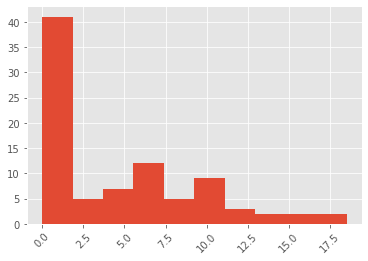

In [43]:
fwd_df.value.hist(xrot=45)

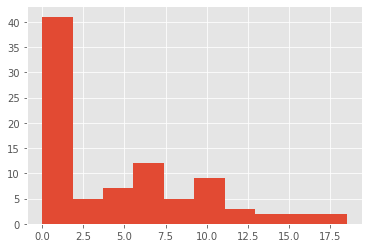

In [44]:
fwd_df.value.hist()

In [45]:
fwd_df.sort_values(by='value')

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,id_x,name,id_y,position,value,ict_score,selection_percentage,current_form,total_contribution,ppgpm
615,Ajeti,Albian,19,4,55,0.0,663,827,0.0,0,...,19,West Ham,4,Forward,0.0,0.0,0.0,0.0,0,0.000000
625,Odubeko,Ademipo,19,4,45,0.0,3304,1759,0.0,0,...,19,West Ham,4,Forward,0.0,0.0,0.0,0.0,0,0.000000
224,Simms,Ellis,7,4,45,0.1,11578,10536,0.0,0,...,7,Everton,4,Forward,0.0,0.0,0.1,0.0,0,0.000000
613,Hugill,Jordan,19,4,55,0.0,429,676,0.0,0,...,19,West Ham,4,Forward,0.0,0.0,0.0,0.0,0,0.000000
133,Richardson,Lewis,4,4,45,0.1,15113,11810,0.0,0,...,4,Burnley,4,Forward,0.0,0.0,0.1,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Adams,Che,16,4,58,4.4,1240712,1254178,2.4,5,...,16,Southampton,4,Forward,14.1,123.1,4.4,2.4,10,0.067241
211,Calvert-Lewin,Dominic,7,4,76,41.4,6669842,4636491,5.0,12,...,7,Everton,4,Forward,15.8,171.5,41.4,5.0,18,0.078947
61,Watkins,Ollie,2,4,63,19.0,2640488,1300074,5.2,9,...,2,Aston Villa,4,Forward,15.9,191.1,19.0,5.2,14,0.076190
456,Wilson,Callum,14,4,67,22.2,3997004,3037551,4.3,1,...,14,Newcastle,4,Forward,17.3,134.7,22.2,4.3,16,0.082090


In [46]:
main_df.to_csv('~/Desktop/fpl_shit.csv')

In [47]:
fulham = main_df[main_df.name == 'Fulham']
fulham.sort_values(by='total_points',ascending =False)

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,id_x,name,id_y,position,value,ict_score,selection_percentage,current_form,total_contribution,ppgpm
253,Areola,Alphonse,8,1,45,3.3,327028,197740,3.9,6,...,8,Fulham,1,Goalkeeper,17.1,56.5,3.3,3.9,0,0.082222
256,Lookman,Ademola,8,3,50,1.1,277784,201932,3.1,3,...,8,Fulham,3,Midfielder,13.0,139.7,1.1,3.1,6,0.068000
238,Decordova-Reid,Bobby,8,4,53,1.0,202176,144670,2.1,2,...,8,Fulham,4,Forward,11.1,74.9,1.0,2.1,6,0.056604
259,Adarabioyo,Tosin,8,2,45,0.4,56848,31610,2.7,6,...,8,Fulham,2,Defender,12.7,53.9,0.4,2.7,1,0.071111
244,Cavaleiro,Ivan Ricardo,8,3,53,0.2,26972,27842,3.4,3,...,8,Fulham,3,Midfielder,10.4,96.6,0.2,3.4,3,0.052830
257,Aina,Ola,8,2,45,0.4,75555,51047,1.6,0,...,8,Fulham,2,Defender,11.8,48.4,0.4,1.6,1,0.064444
248,Anguissa,André-Frank,8,3,45,1.7,426209,378655,2.3,1,...,8,Fulham,3,Midfielder,11.8,83.8,1.7,2.3,3,0.053333
241,Mitrović,Aleksandar,8,4,55,3.6,539668,1846119,1.7,1,...,8,Fulham,4,Forward,8.4,87.5,3.6,1.7,5,0.047273
258,Andersen,Joachim,8,2,45,0.1,6184,3992,2.6,6,...,8,Fulham,2,Defender,9.8,33.3,0.1,2.6,0,0.062222
227,Loftus-Cheek,Ruben,8,3,59,0.2,21269,26462,2.0,3,...,8,Fulham,3,Midfielder,7.1,58.7,0.2,2.0,1,0.042373


In [48]:
main_df.head()

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,...,id_x,name,id_y,position,value,ict_score,selection_percentage,current_form,total_contribution,ppgpm
0,Özil,Mesut,1,3,67,0.5,3441,54064,0.0,0,...,1,Arsenal,3,Midfielder,0.0,0.0,0.5,0.0,0,0.000000
1,Sokratis,Sokratis,1,2,48,0.1,10266,19016,0.0,0,...,1,Arsenal,2,Defender,0.0,0.0,0.1,0.0,0,0.000000
2,David Luiz,David,1,2,54,0.7,50299,101665,2.7,0,...,1,Arsenal,2,Defender,4.6,24.9,0.7,2.7,0,0.035185
3,Aubameyang,Pierre-Emerick,1,3,113,6.5,579446,3271267,3.3,1,...,1,Arsenal,3,Midfielder,6.5,105.0,6.5,3.3,6,0.033628
4,Cédric,Cédric,1,2,46,0.3,21801,40654,3.7,2,...,1,Arsenal,2,Defender,5.0,17.7,0.3,3.7,1,0.082609


In [49]:
# remove a duplicate column if necessary
main_df = main_df.loc[:,~main_df.columns.duplicated()]

In [50]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'